# Import

In [9]:
# Work with paths
import sys
sys.path.append('..')

# import implemented modules
import src.config as cfg
from src.data import make_dataset
import src.utils as utils

# import other modules
from sklearn.model_selection import train_test_split

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import os
import sklearn


# Generate Dataset

In [3]:
! python3 ../src/data/make_dataset.py ../data/raw/train.csv ../data/processed/train.pkl ../data/processed/target.pkl

2022-10-15 17:08:01,122 - __main__ - INFO - making final data set from raw data
2022-10-15 17:08:01,135 - __main__ - INFO - Target saved to ../data/processed/target.pkl
2022-10-15 17:08:01,135 - __main__ - INFO - Dataset saved to ../data/processed/train.pkl


In [4]:
# I don't know how to make this work in the notebook

# make_dataset.main(  input_filepath          =cfg.RAW_DATA_PATH, 
#                     output_data_filepath    =cfg.PROCESSED_DATA_PATH, 
#                     output_target_filepath  =cfg.PROCESSED_TARGET_PATH
#                 )

Load dataset

In [5]:
train  = pd.read_pickle(str(os.getcwd() + "/../data/processed/train.pkl"))
target = pd.read_pickle(str(os.getcwd() + "/../data/processed/target.pkl"))

Generate tran and test selections

In [6]:
train_data, val_data, train_target, val_target = train_test_split(
                                                                train, 
                                                                target, 
                                                                train_size=0.8, 
                                                                random_state=cfg.RANDOM_STATE, 
                                                                stratify=target.iloc[:,[1, 2, 3, 4]].sum(axis=1))

Visualize data

In [50]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=cfg.RANDOM_STATE, perplexity=15, n_iter=1000)
train_copy = train.copy()
train_copy = np.array(utils.preprocess_pipe.fit_transform(train_copy))
print(train_copy.shape)
tsne_representation = tsne.fit_transform(train_copy)
print(tsne_representation.shape)


(955, 136)


/Users/alexgiving/Library/Python/3.8/lib/python/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/alexgiving/Library/Python/3.8/lib/python/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(955, 2)


<AxesSubplot:>

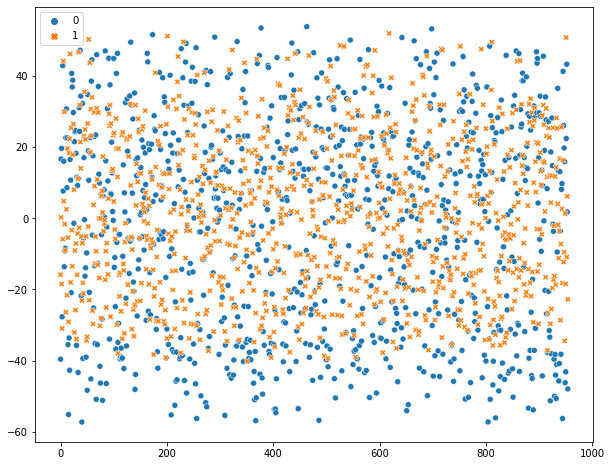

In [51]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=pd.DataFrame(tsne_representation))

(955, 136)


/Users/alexgiving/Library/Python/3.8/lib/python/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/alexgiving/Library/Python/3.8/lib/python/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(955, 3)


/var/folders/87/3cnclgy53jd11fkzc4qp7mlc0000gn/T/ipykernel_75923/1183080829.py:18: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


Text(0.5, 0, 'Z Label')

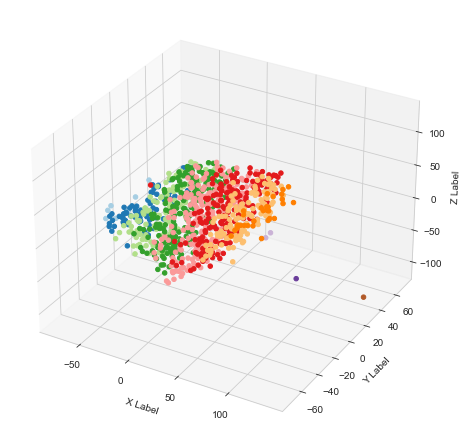

In [61]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=3, random_state=cfg.RANDOM_STATE, perplexity=15, n_iter=1000)
train_copy = train.copy()
train_copy = np.array(utils.preprocess_pipe.fit_transform(train_copy))
print(train_copy.shape)
tsne_representation = tsne.fit_transform(train_copy)
print(tsne_representation.shape)



import seaborn as sns, numpy as np, pandas as pd, random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
sns.set_style("whitegrid", {'axes.grid' : False})

fig = plt.figure(figsize=(6,6))

ax = Axes3D(fig)
x = tsne_representation[:, 0]
y = tsne_representation[:, 1]
z = tsne_representation[:, 2]

g = ax.scatter(x, y, z, c=x, marker='o', depthshade=False, cmap='Paired')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

If we want to predict illness, we are interested in not getting FalseNegative 

Generate features

In [ ]:
None